In [1]:
import folium
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import json
import googlemaps
import matplotlib.pyplot as plt
%matplotlib inline
import platform
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system. sorry~~~')

In [83]:
data1 = pd.read_excel('../data/서울교통공사_관할역별_일별_시간대별_이용인원_20181231(1-8호선).xlsx', header=1)

In [111]:
data11 = data1[(data1['호선']=='2호선')& (data1['구분']=='평')]
data_1 = pd.DataFrame({'호선': data11['호선'],'역명':data11['역명'], '이용인원':data11['05 ~ 06']})

In [116]:
data_group = pd.DataFrame(data_1.groupby('역명').이용인원.mean())
data_tot = data_group.sort_values('이용인원', ascending=False).head(20)

In [117]:
data_tot.head()

,이용인원
역명,
신도림,948.684959
구로디지털단지,925.325203
신림,912.044715
대림(구로구청),828.323171
서울대입구(관악구청),756.081301


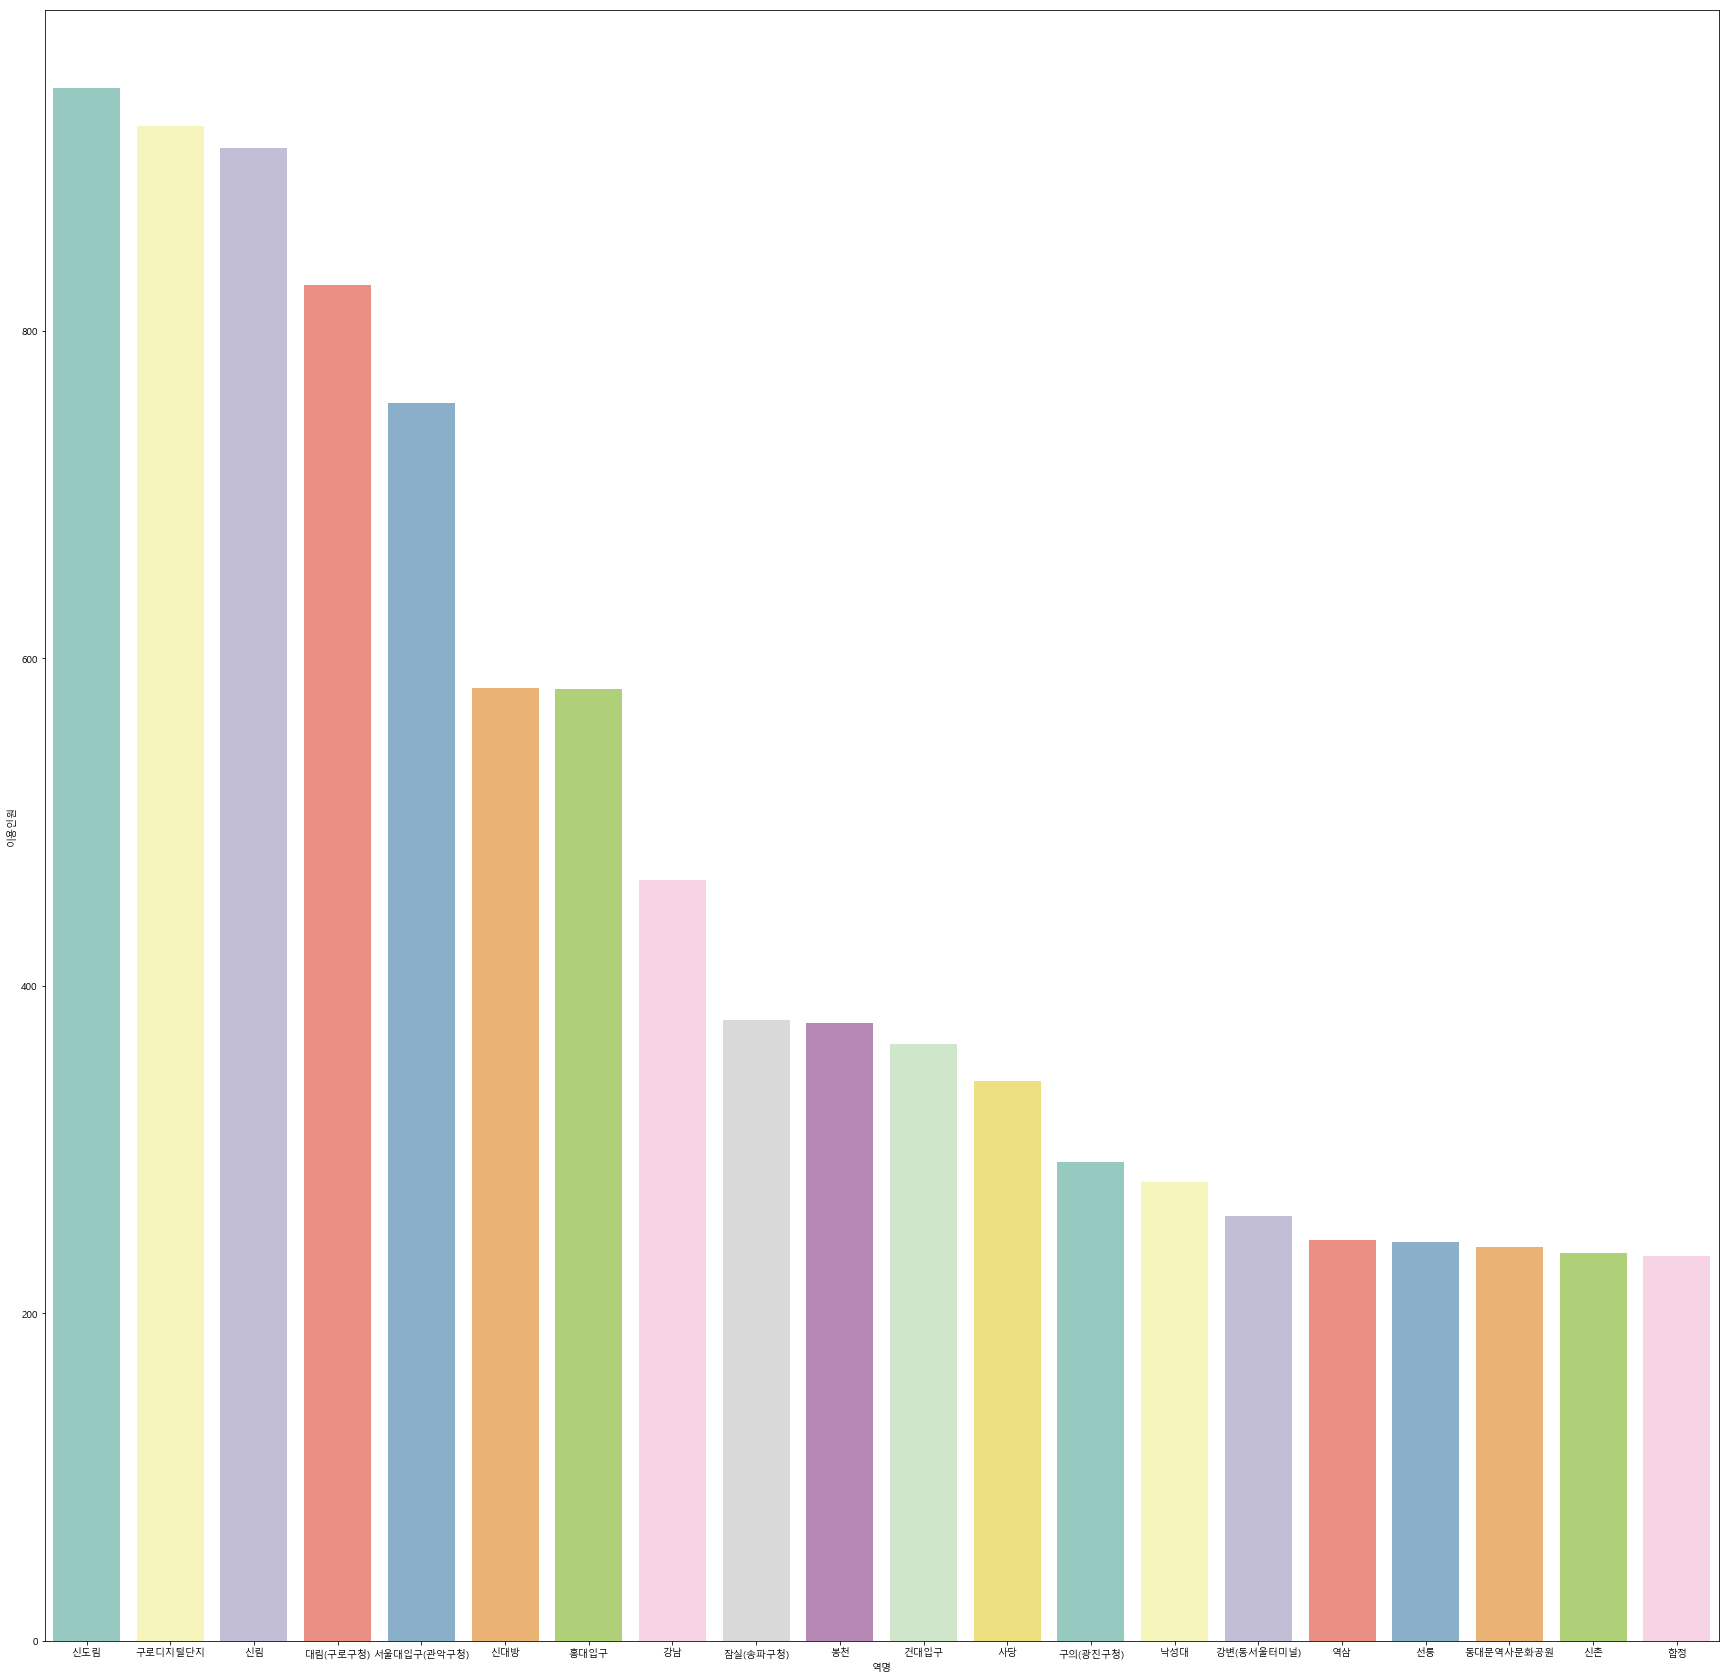

In [119]:
plt.figure(figsize = (30,30))
sns.barplot(x = data_tot.index, y ='이용인원',  data=data_tot, palette = "Set3")

# 2. 따릉이 정류소 위치를 지도상에 표시해 보세요

In [79]:
data2 = pd.read_excel('../data/공공자전거 대여소 정보_201905.xlsx')
data2.head()

,구분,대여소번호,대여소명,위도,경도,거치대수
0,마포구,101,101. (구)합정동 주민센터,37.549561,126.905754,5
1,마포구,102,102. 망원역 1번출구 앞,37.556000,126.910454,20
2,마포구,103,103. 망원역 2번출구 앞,37.554951,126.910835,14
3,마포구,104,104. 합정역 1번출구 앞,37.550629,126.914986,13
4,마포구,105,105. 합정역 5번출구 앞,37.550007,126.914825,5


In [81]:
map = folium.Map(location = [37.5502,126.982], zoom_start = 10.5)

for n in data2.index:
    folium.Marker([data2['위도'][n], data2['경도'][n]], 
                              radius=15, color='#CD3181', 
                              fill_color='#CD3181',
                              fill=True, popup = data2['대여소명'][n]).add_to(map)
map.save('C:/Users/A/Anaconda3/DataScience/folium_map/따릉이 대여소 위치.html')

map
